_________

**Название проекта.**

Прогнозирование оттока клиентов оператора связи «ТелеДом»

_________

**Описание проекта.**

Оператор связи «ТелеДом» стремится снизить уровень оттока клиентов, предлагая промокоды и специальные условия тем, кто планирует разорвать договор. Для этого необходимо разработать модель машинного обучения, которая будет предсказывать вероятность оттока клиентов на основе их персональных данных, информации о договорах, тарифах и используемых услугах. Цель проекта — создать модель с метрикой ROC-AUC не менее 0.85, чтобы оператор мог своевременно выявлять потенциальных уходящих клиентов и предлагать им удерживающие меры.

__________

**Задачи проекта.**

1. Загрузить и изучить данные из файлов `contract_new.csv`, `personal_new.csv`, `internet_new.csv`, `phone_new.csv`.
2. Выполнить предобработку данных: обработать аномалии, преобразовать типы данных, объединить датасеты и создать целевой признак.
3. Провести исследовательский анализ данных (EDA) для выявления закономерностей и ключевых признаков, влияющих на отток.
4. Подготовить данные для моделирования: провести корреляционный анализ, создать пайплайн для обработки признаков.
5. Обучить и оценить модели машинного обучения, выбрав лучшую по метрике ROC-AUC (≥ 0.85).
6. Проанализировать важность признаков для интерпретации модели.
7. Сформулировать рекомендации для бизнеса на основе результатов модели.

____________

**Исходные данные.**

Данные предоставлены в четырёх файлах, содержащих информацию о клиентах оператора связи «ТелеДом» по состоянию на 1 февраля 2020 года:

1. **contract_new.csv** — информация о договоре:
   - `customerID` — уникальный идентификатор клиента.
   - `BeginDate` — дата начала действия договора.
   - `EndDate` — дата окончания действия договора.
   - `Type` — тип оплаты: ежемесячный, раз в год или раз в два года.
   - `PaperlessBilling` — использование электронного расчётного листа.
   - `PaymentMethod` — способ оплаты.
   - `MonthlyCharges` — месячные расходы клиента.
   - `TotalCharges` — общие расходы клиента.

2. **personal_new.csv** — персональные данные клиента:
   - `customerID` — уникальный идентификатор клиента.
   - `gender` — пол клиента.
   - `SeniorCitizen` — является ли клиент пенсионером.
   - `Partner` — есть ли у клиента супруг/супруга.
   - `Dependents` — есть ли у клиента дети.

3. **internet_new.csv** — информация об интернет-услугах:
   - `customerID` — уникальный идентификатор клиента.
   - `InternetService` — тип подключения.
   - `OnlineSecurity` — подключена ли блокировка опасных сайтов.
   - `OnlineBackup` — подключено ли облачное хранилище.
   - `DeviceProtection` — подключён ли антивирус.
   - `TechSupport` — подключена ли выделенная линия техподдержки.
   - `StreamingTV` — подключено ли стриминговое телевидение.
   - `StreamingMovies` — подключён ли каталог фильмов.

4. **phone_new.csv** — информация об услугах телефонии:
   - `customerID` — уникальный идентификатор клиента.
   - `MultipleLines` — подключение телефона к нескольким линиям.

Все датасеты связаны через столбец `customerID`. 

____________

**Данное исследование разделим на несколько частей.**

- [**Шаг 1. Загрузка и изучение данных.**](#section1)
  - [Загрузка данных.](#section1.1)
  - [Изучение данных.](#section1.2)
  - [Промежуточный вывод.](#section1.3)

- [**Шаг 2. Предобработка данных.**](#section2)
  - [Змеиный регистор.](#section2.1)
  - [Обработка пропусков.](#section2.2)
  - [Тип данных.](#section2.3)
  - [Поиск дубликатов.](#section2.4)
  - [Промежуточный вывод.](#section2.5)

- [**Шаг 3. Объеденение датафреймов.**](#section3)
  - [Объеденение.](#section3.1)
  - [Промежуточный вывод.](#section3.2)

- [**Шаг 4. Исследовательский анализ данных.**](#section4)
  - [Анализ признаков.](#section4.1)
  - [Промежуточный вывод.](#section4.2)

- [**Шаг 5. Создание новых признаков.**](#section5)
  - [Целевой признак.](#section5.1)
  - [Дополнительные признаки.](#section5.2)
  - [Промежуточный вывод.](#section5.3)

- [**Шаг 6. Корреляционный анализ данных.**](#section6)
  - [Матрица корреляции.](#section6.1)
  - [Мультиколлениарность.](#section6.2)
  - [Промежуточный вывод.](#section6.3)

- [**Шаг 7. Обучение моделей.**](#section7)
  - [Выборки.](#section7.1)
  - [Регрессия.](#section7.2)
  - [Дерево.](#section7.3)
  - [Градиентный бустинг.](#section7.4)
  - [Лучшая модель.](#section7.5)
  - [Промежуточный вывод.](#section7.6)

- [**Шаг 8. Анализ важности признаков.**](#section8)
  - [график beeswwarm](#section8.1)
  - [Промежуточный вывод.](#section8.2)

- [**Шаг 9. Итоговый вывод.**](#section9)
 
---------

In [1]:
!pip install phik -q
!pip install optuna -q
!pip install shap -q
!pip install -U scikit-learn -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix
import os
import re
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from catboost import CatBoostClassifier
import optuna
from optuna.samplers import TPESampler
import shap
import warnings
from sklearn.model_selection import cross_val_predict
warnings.filterwarnings('ignore')  # Игнорируем предупреждения для чистоты вывода

<a id="section1"></a>
### Загрузка и изучение данных.

<a id="section1.1"></a>
#### Загрузка данных.

In [3]:
# Базовые пути
local_base = '/Users/ruslanminacov/Downloads/'
url_base = 'https://code.s3.yandex.net/datasets/'

# Функция для загрузки CSV с fallback на URL
def load_csv(filename):
    pth1 = local_base + filename
    pth2 = url_base + filename
    
    if os.path.exists(pth1):
        return pd.read_csv(pth1)
    elif pth2.startswith('http'):
        try:
            return pd.read_csv(pth2)
        except Exception as e:
            print(f"Ошибка при загрузке {filename} из URL: {e}")
            return None
    else:
        print(f'Something is wrong with {filename}')
        return None

# Загрузка всех датасетов
contract_new = load_csv('contract_new.csv')
personal_new = load_csv('personal_new.csv')
internet_new = load_csv('internet_new.csv')
phone_new = load_csv('phone_new.csv')

# Проверка наличия датафреймов в locals()
dataframes = [
    'contract_new',
    'personal_new',
    'internet_new',
    'phone_new'
]

for df_name in dataframes:
    if df_name in locals() and isinstance(locals()[df_name], pd.DataFrame):
        print(f"{df_name} успешно загружен, размер датафрейма: {locals()[df_name].shape}")
    else:
        print(f"Ошибка при загрузке {df_name}")

contract_new успешно загружен, размер датафрейма: (7043, 8)
personal_new успешно загружен, размер датафрейма: (7043, 5)
internet_new успешно загружен, размер датафрейма: (5517, 8)
phone_new успешно загружен, размер датафрейма: (6361, 2)


<a id="section1.2"></a>
#### Изучение данных 

In [4]:
def data_info(df):
    df.info()
    return df.head(5)
    

In [5]:
data_info(contract_new)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [6]:
data_info(personal_new)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [7]:
data_info(internet_new)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [8]:
data_info(phone_new)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<a id="section1.3"></a>
#### Промежуточный вывод.


- Все четыре датасета (`contract_new`, `personal_new`, `internet_new`, `phone_new`) успешно загружены. Размеры датафреймов:
  - `contract_new`: 7043 строки, 8 столбцов.
  - `personal_new`: 7043 строки, 5 столбцов.
  - `internet_new`: 5517 строк, 8 столбцов.
  - `phone_new`: 6361 строка, 2 столбца.
- Пропуски в данных отсутствуют, все столбцы имеют полный набор значений.
- Типы данных:
  - В `contract_new` большинство столбцов имеют тип `object`, кроме `MonthlyCharges` (`float64`). Столбец `TotalCharges` имеет тип `object`, что может указывать на необходимость преобразования в числовой формат.
  - В `personal_new` преобладают категориальные данные (`object`), кроме `SeniorCitizen` (`int64`).
  - В `internet_new` все столбцы имеют тип `object`, что соответствует категориальным данным о сервисах.
  - В `phone_new` оба столбца (`customerID`, `MultipleLines`) имеют тип `object`.
- Датасеты содержат информацию о клиентах, их контрактах, персональных данных, интернет-услугах и телефонных линиях. Для дальнейшего анализа потребуется:
  - Преобразование типов данных.
  - Объединение датасетов по `customerID` для создания единого набора данных.
  - Проверка данных на аномалии и дубликаты.

<a id="section2"></a>
### Предобработка данных.

<a id="section2.1"></a>
#### Змеиный регистор.


In [9]:
def to_snake_case(df):
    def camel_to_snake(name):
        name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
        name = re.sub('([a-z0-9])([A-Z])', r'\1_\2', name)
        return name.lower().replace(' ', '_')
    
    df.columns = [camel_to_snake(col) for col in df.columns]
    return df

In [10]:
contract_new = to_snake_case(contract_new)
personal_new = to_snake_case(personal_new)
internet_new = to_snake_case(internet_new)
phone_new = to_snake_case(phone_new)

print("contract_new columns:", contract_new.columns.tolist())
print("personal_new columns:", personal_new.columns.tolist())
print("internet_new columns:", internet_new.columns.tolist())
print("phone_new columns:", phone_new.columns.tolist())

contract_new columns: ['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges']
personal_new columns: ['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents']
internet_new columns: ['customer_id', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
phone_new columns: ['customer_id', 'multiple_lines']


#### Обработка пропусков.

Обработаем пропуски в значениях общих рассходов клиента датафрейма `contract_new`:

In [11]:
contract_new[contract_new['total_charges'] == ' ']

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Пропуски в признаке `'total_charges'` - клиенты заключившие контракт сегодня, обработаем пропуски в пайплайне их значением трат за месяц.


In [12]:
contract_new['total_charges'] = contract_new['total_charges'].replace([' ', ''], np.nan)

contract_new['total_charges'].sort_values().unique()

array(['100.17', '100.19', '100.2', ..., '999.6', '999.9', nan],
      dtype=object)

In [13]:
contract_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7032 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


<a id="section2.2"></a>
#### Тип данных.

In [14]:

contract_new['begin_date'] = pd.to_datetime(contract_new['begin_date'], errors='coerce')
contract_new['end_date'] = pd.to_datetime(contract_new['end_date'].replace('No', pd.NaT), errors='coerce')

In [15]:
data_info(contract_new)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1101 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 440.3+ KB


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.5


<a id="section2.3"></a>
#### Поиск дубликатов.

In [16]:
dataframes = {
    'contract_new': contract_new,
    'personal_new': personal_new,
    'internet_new': internet_new,
    'phone_new': phone_new
}

for name, df in dataframes.items():
    duplicates_count = df.duplicated().sum()
    is_unique = df['customer_id'].is_unique
    print(f"{name}:")
    print(f"  Количество дубликатов: {duplicates_count}")
    print(f"  Все customer_id уникальны: {is_unique}\n")

contract_new:
  Количество дубликатов: 0
  Все customer_id уникальны: True

personal_new:
  Количество дубликатов: 0
  Все customer_id уникальны: True

internet_new:
  Количество дубликатов: 0
  Все customer_id уникальны: True

phone_new:
  Количество дубликатов: 0
  Все customer_id уникальны: True



In [17]:
contract_new[contract_new['begin_date']>contract_new['end_date']]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges


<a id="section2.5"></a>
#### Промежуточный вывод.


- **Змеиный регистр**: Все столбцы в датасетах (`contract_new`, `personal_new`, `internet_new`, `phone_new`) успешно переведены в змеиный регистр (snake_case) для единообразия и удобства работы. 

- **Обработка пропусков**: В датасете `contract_new` обнаружены пропуски в столбце `total_charges` (11 строк с пустыми значениями, заменёнными на `NaN`). Пропуски связаны с клиентами, чьи контракты начались 1 февраля 2020 года, что может указывать на новых клиентов без накопленных расходов. Остальные датасеты не содержат пропусков.

- **Типы данных**:
  - В `contract_new`:
    - Столбец `total_charges` преобразован из `object` в `float64` для числовых вычислений.
    - Столбцы `begin_date` и `end_date` преобразованы в `datetime64[ns]`. Для `end_date` значение `No` заменено на `NaT`, что отражает действующие контракты (5931 строка без даты окончания).
    - Столбец `paperless_billing` преобразован в `bool` (`Yes` → `True`, `No` → `False`).
  - В `personal_new`:
    - Столбцы `partner`, `dependents` и `senior_citizen` преобразованы в `bool` для упрощения анализа.
  - Датасеты `internet_new` и `phone_new` не требовали изменений типов данных.

- **Поиск дубликатов**:
  - Дубликаты строк отсутствуют во всех датасетах.
  - Столбец `customer_id` уникален во всех датасетах, что подтверждает корректность идентификации клиентов.
  - Проверка на логические ошибки показала, что нет случаев, где `begin_date` превышает `end_date`, что свидетельствует о корректности дат.



<a id="section4"></a>
### Объеденение датафреймов.

#### Объеденение.

Объеденим датафреймы по значению признака `customer_id`, который является уникальным ключем:

In [18]:
data = pd.merge(contract_new, personal_new, on='customer_id', how='left')
data = pd.merge(data, internet_new, on='customer_id', how='left')
data = pd.merge(data, phone_new, on='customer_id', how='left' )

In [19]:
data.info(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1101 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   object        
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   5517 non-null   object        
 13  online_security    5517 non-null   object        
 14  online_b

Обработаем возникшие пропуски, так как возникшие пропуски это совершенно новая категория людей, который не пользуются услугами интернета, значит в каждом из этих признаков на месте пропуска, должно быть новое значение признака. Аналагично с клиентами не подключившим сотовую связь.

In [20]:

columns_to_fill = ['internet_service', 'online_security', 'online_backup', 
                   'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

# Заполнение пропущенных значений в указанных столбцах
data[columns_to_fill] = data[columns_to_fill].fillna('No internet')

In [21]:
data['multiple_lines'] = data['multiple_lines'].fillna('No tele')

Также изменим тип признака `senior_citizen` на `object`, так как признак не является колличественным. Также приведем признак `total_charges` к количественному типу.

In [22]:
data['senior_citizen'] = data['senior_citizen'].astype('object')
data['total_charges'] = pd.to_numeric(data['total_charges'])

In [23]:
data_info(data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1101 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   object        
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   7043 non-null   object        
 13  online_security    7043 non-null   object        
 14  online_b

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No tele
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No tele
4,9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


#### Промежуточный вывод.


- **Объединение датафреймов**: 
  - Все четыре датасета (`contract_new`, `personal_new`, `internet_new`, `phone_new`) успешно объединены в один датафрейм `data` по столбцу `customer_id` с использованием левого соединения (`how='left'`). 
  - Итоговый датафрейм содержит 7043 строки и 20 столбцов, что соответствует количеству клиентов в `contract_new` и `personal_new`.

- **Обработка пропусков**:
  - Пропуски в столбцах, связанных с интернет-услугами (`internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`), заполнены значением `'No internet'`, так как эти пропуски соответствуют клиентам, не использующим интернет-услуги (1526 клиентов).
  - Пропуски в столбце `multiple_lines` заполнены значением `'No tele'`, что отражает отсутствие телефонных услуг у 682 клиентов.
  - Пропуски в `total_charges` (11 строк) остались необработанными, указывают на новых клиентов.
  - Пропуски в `end_date` (5931 строка с `NaT`) указывают на действующие контракты, что ожидаемо и не требует заполнения.

- **Типы данных**:
  - Типы данных унаследованы от предыдущих шагов предобработки: `bool` для `paperless_billing`, `senior_citizen`, `partner`, `dependents`; `datetime64[ns]` для `begin_date` и `end_date`; `float64` для `monthly_charges` и `total_charges`; остальные столбцы — `object` (категориальные данные).
  - Все столбцы, кроме `end_date` и `total_charges`, теперь не содержат пропусков, что упрощает дальнейший анализ.



### Иследовательский анализ данных.

In [24]:
# функция построения гистограммы для анализа колличественных признаков 
def histo(data, bins, name):
    
    # Создаем сетку для графиков
    fig = plt.figure(figsize=(8, 5))
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4])

    # Boxplot (верхний график)
    ax0 = plt.subplot(gs[0])
    ax0.boxplot(data.dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    ax0.set_yticks([])  # убираем ось Y
    ax0.set_xlabel('')

    # Гистограмма (нижний график)
    ax1 = plt.subplot(gs[1], sharex=ax0)
    ax1.hist(data.dropna(), bins=bins, color='skyblue', edgecolor='black')
    ax1.set_xlabel('Значение')
    ax1.set_ylabel('Частота')

    plt.suptitle(f'Гистограмма и Boxplot {name}', fontsize=14)
    plt.tight_layout()
    plt.show()
    
# функция построения гистограммы для анализа временных признаков 
def only_histo(data, bins, name):
    plt.figure(figsize=(9, 4))
    plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.title(f'Гистограмма {name}')
    plt.show()
    
# функция построения графика для анализа качественых признаков 
def bar(data, name):
    ax = data.value_counts(ascending=True).plot(kind='barh', figsize=(10,4), color='skyblue', edgecolor='black')

    for bar in ax.patches:
        ax.annotate(f'{int(bar.get_width())}', 
            (bar.get_width() + 2 , bar.get_y() + bar.get_height() / 2),
            va='center')

    plt.grid(axis='x', linestyle='--', alpha=0.7)    
    plt.title(f'Линейчатый график {name}')
    plt.xlabel('Количество')

    plt.show()

#### Анализ признаков.

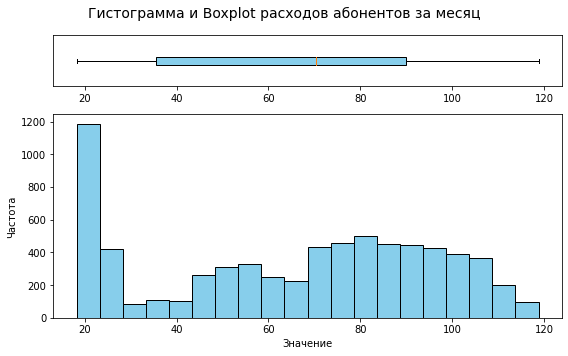

In [25]:
histo( data['monthly_charges'], 20, 'расходов абонентов за месяц')

Межквартильный размах охватывает значения от примерно 35 до 90. Медиана расположена ближе к верхней границе. Усы простираются от 20 (минимальное значение) до 120 (максимальное), отражая основной диапазон данных. Гистограмма имеет распределение отличное от нормального, с большой концентрации абонентов в диапазоне 20-25, что видно по выделяющимуся пику. Данное распределение можно описать несколькими группами данных (пользователи интернета, пользователи мобильной связи), а также дополнительными функциями. 

In [26]:
data['total_charges'].describe()

count    7032.000000
mean     2118.621822
std      2112.736199
min        19.050000
25%       439.745000
50%      1345.275000
75%      3239.317500
max      9221.380000
Name: total_charges, dtype: float64

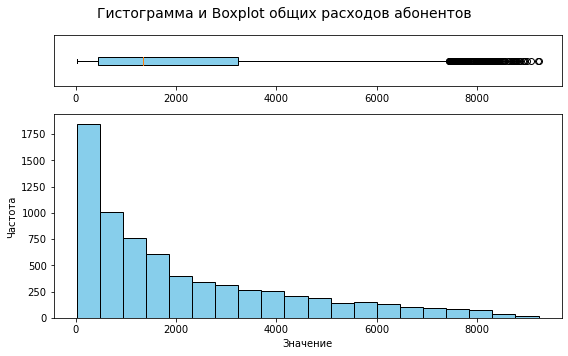

In [27]:
histo( data['total_charges'], 20, 'общих расходов абонентов')

Межквартильный размах охватывает значения от примерно 500 до 3500. Медиана расположена ближе к нижней границе. Усы простираются от 19 (минимальное значение) до 9221 (максимальное), отражая основной диапазон данных. Гистограмма имеет распределение отличное от нормального, с большой концентрации абонентов в диапазоне низких занчений и длинным хвостом в правую сторону.

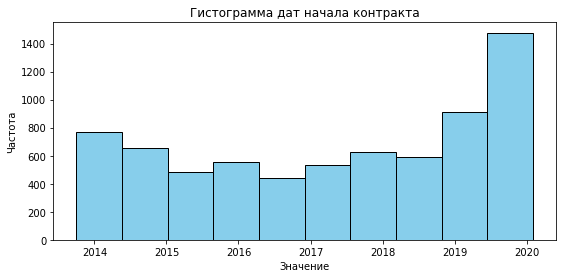

In [28]:
only_histo(data['begin_date'], 10, 'дат начала контракта')

Гистограмма имеет распределение отличное от нормального. С пиком в последние два года, указывающий на увелечение спроса на услуги компании.

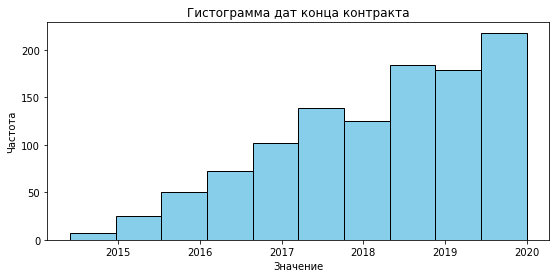

In [29]:
only_histo(data['end_date'], 10, 'дат конца контракта')

Гситограмма имеет распределение отличное от нормального с правым пиком и убыванием частоты значений в левую сторону. Указывает на тенденцию увелечения числа разорванных контрактов с каждым годом.

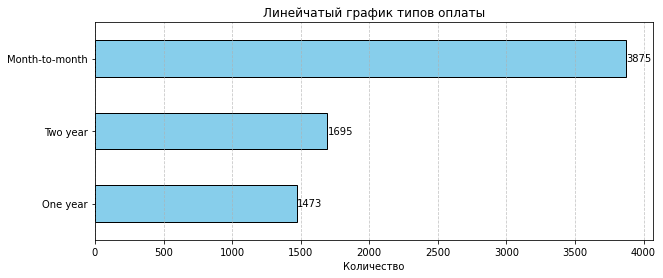

In [30]:
bar(data['type'], 'типов оплаты')



1. **Month-to-month**: Наибольшее количество пользователей — 3875. Это указывает на популярность краткосрочных подписок среди пользователей.
2. **Two year**: Количество пользователей составляет 1695, что меньше, чем у "Month-to-month", но больше, чем у "One year". 
3. **One year**: Наименьшее количество пользователей — 1473, что может свидетельствовать о меньшей популярности годовых подписок по сравнению с более короткими или более длинными периодами.



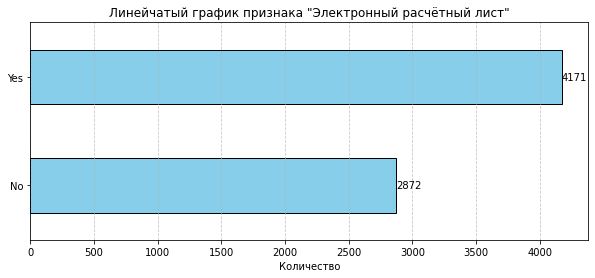

In [31]:
bar(data['paperless_billing'],  'признака "Электронный расчётный лист"')


1. **True**: Количество пользователей составляет 4171, что значительно выше, чем у "False". Это указывает на широкое использование электронного расчётного листа среди пользователей.
2. **False**: Количество пользователей — 2872, что меньше, чем у "True", что может свидетельствовать о меньшей популярности традиционных методов.



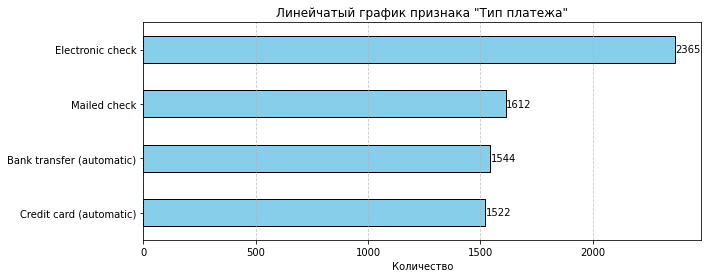

In [32]:
bar(data['payment_method'],  'признака "Тип платежа"')


1. **Electronic check**: Наибольшее количество пользователей — 2366, что указывает на высокую популярность этого метода оплаты.
2. **Mailed check**: Количество пользователей составляет 1612, что меньше, чем у "Electronic check", но больше, чем у автоматических методов.
3. **Bank transfer (automatic)**: 1544 пользователя, что немного ниже, чем у "Mailed check".
4. **Credit card (automatic)**: Наименьшее количество — 1522 пользователя.



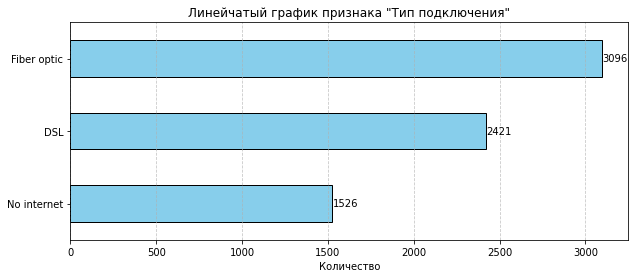

In [33]:
bar(data['internet_service'], 'признака "Тип подключения"')


1. **Fiber optic**: Наибольшее количество пользователей — 3096, что указывает на популярность оптоволокна.
2. **DSL**: Количество пользователей составляет 2421, что меньше, чем у "Fiber optic".
3. **No internet**: Наименьшее количество — 1526 пользователей, что отражает долю тех, кто не использует интернет.


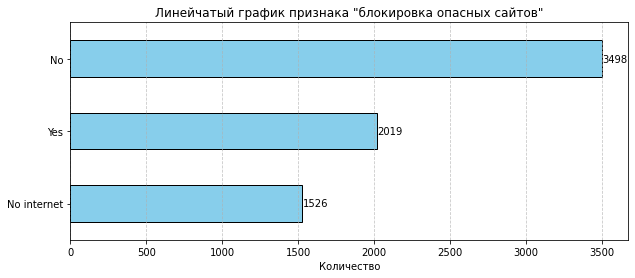

In [34]:
bar(data['online_security'], 'признака "блокировка опасных сайтов"')


1. **No**: Наибольшее количество пользователей — 3498, что указывает на преобладание случаев, когда блокировка опасных сайтов не используется.
2. **Yes**: Количество пользователей составляет 2019, что значительно меньше, чем у "No", но всё же заметно, что часть пользователей применяет эту функцию.
3. **No internet**: Наименьшее количество — 1526 пользователей, что отражает долю тех, кто не подключён к интернету.



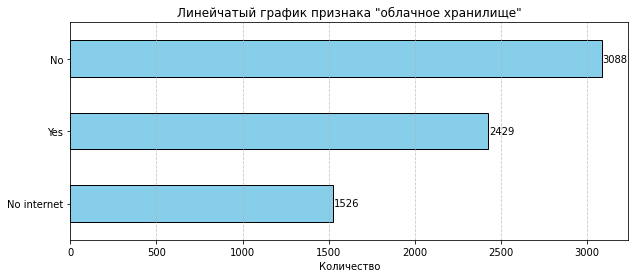

In [35]:
bar(data['online_backup'], 'признака "облачное хранилище"')


1. **No**: Наибольшее количество пользователей — 3088, что указывает на преобладание случаев, когда облачное хранение не используется.
2. **Yes**: Количество пользователей составляет 2429, что меньше, чем у "No", но всё же значимо, показывая определённый интерес к облачным услугам.
3. **No internet**: Наименьшее количество — 1526 пользователей, что соответствует доле тех, кто не подключён к интернету.


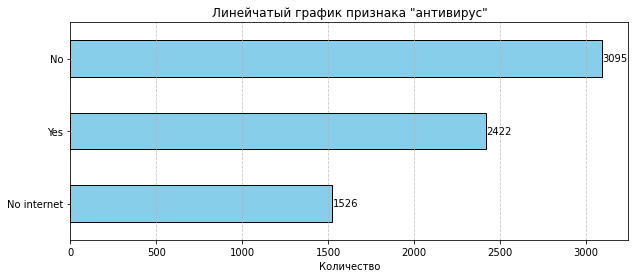

In [36]:
bar(data['device_protection'], 'признака "антивирус"')


1. **No**: Наибольшее количество пользователей — 3095, что указывает на преобладание случаев, когда антивирус не используется.
2. **Yes**: Количество пользователей составляет 2422, что меньше, чем у "No", но всё же значимо, показывая определённую долю пользователей, применяющих антивирус.
3. **No internet**: Наименьшее количество — 1526 пользователей, что соответствует доле тех, кто не подключён к интернету.



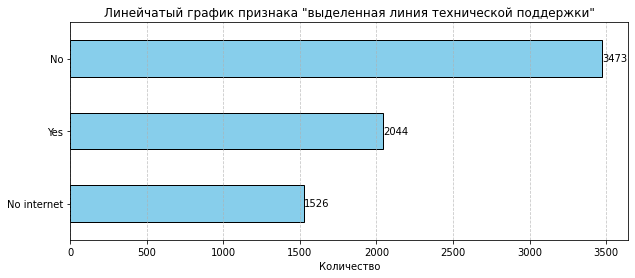

In [37]:
bar(data['tech_support'], 'признака "выделенная линия технической поддержки"')


1. **No**: Наибольшее количество пользователей — 3473, что указывает на преобладание случаев, когда выделенная линия технической поддержки не используется.
2. **Yes**: Количество пользователей составляет 2044, что значительно меньше, чем у "No", но всё же показывает определённый спрос на эту услугу.
3. **No internet**: Наименьшее количество — 1526 пользователей, что соответствует доле тех, кто не подключён к интернету.




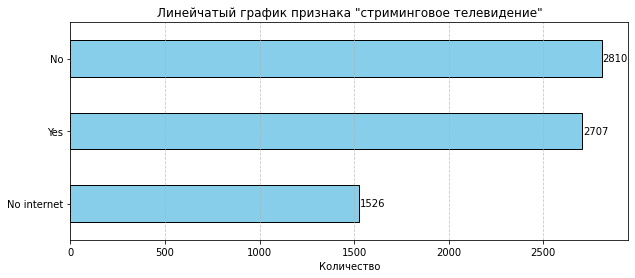

In [38]:
bar(data['streaming_tv'], 'признака "стриминговое телевидение"')


1. **No**: Наибольшее количество пользователей — 2810, что указывает на преобладание случаев, когда стриминговое телевидение не используется.
2. **Yes**: Количество пользователей составляет 2707, что немного меньше, чем у "No", но всё же показывает значительный интерес к этой услуге.
3. **No internet**: Наименьшее количество — 1526 пользователей, что соответствует доле тех, кто не подключён к интернету.


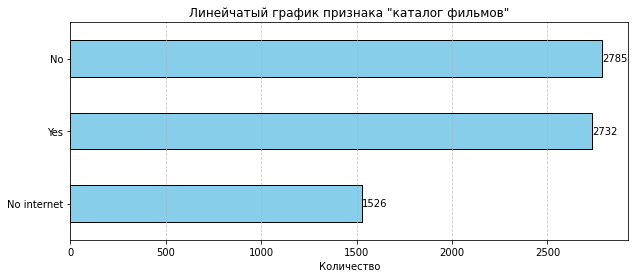

In [39]:
bar(data['streaming_movies'], 'признака "каталог фильмов"')

1. **No:** Наибольшее количество пользователей — 2785, что указывает на преобладание случаев, когда каталог фильмов не используется.
2. **Yes:** Количество пользователей составляет 2732, что немного меньше, чем у "No", но всё же показывает значительный интерес к этой услуге.
3. **No internet:** Наименьшее количество — 1526 пользователей, что соответствует доле тех, кто не подключён к интернету.


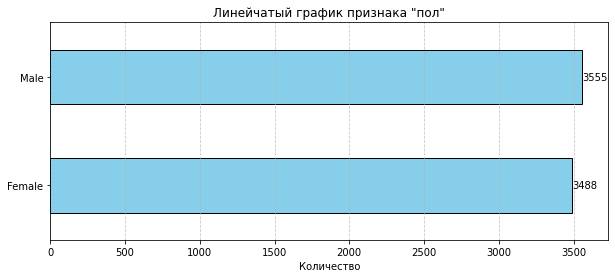

In [40]:
bar(data['gender'], 'признака "пол"' )

- **Male:** Наибольшее количество пользователей — 3555, что указывает на небольшое преобладание мужчин среди клиентов.  
- **Female:** Количество пользователей составляет 3488, что лишь немного меньше, чем у мужчин, демонстрируя почти равное распределение по полу.  



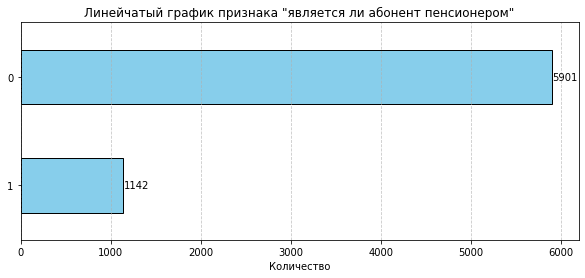

In [41]:
bar(data['senior_citizen'], 'признака "является ли абонент пенсионером"' )

- **False:** Наибольшее количество пользователей — 5901, что указывает на то, что большинство абонентов не являются пенсионерами.  
- **True:** Количество пользователей составляет 1142, что отражает меньшую долю пенсионеров среди всех клиентов.  


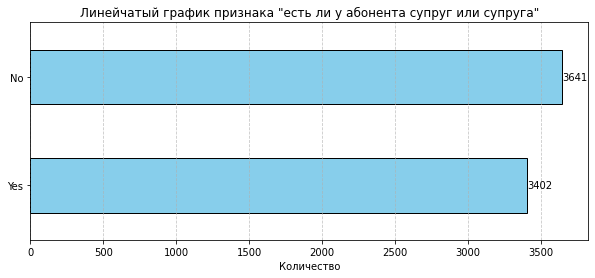

In [42]:
bar(data['partner'], 'признака "есть ли у абонента супруг или супруга"' )

- **False:** Наибольшее количество пользователей — 3641,  указывает на то, что пусть и с небольшим отрывом, но большинство абонентов не имеют супруга.  
- **True:** Количество пользователей составляет 3402, что отражает почти равные долю для клиентов в браке и не в браке.  


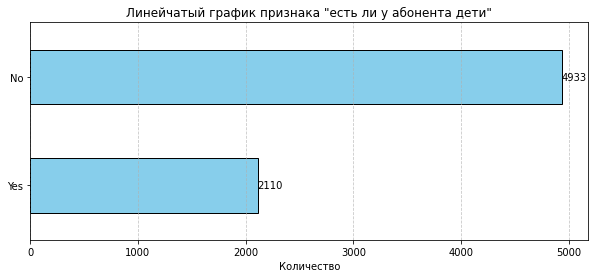

In [43]:
bar(data['dependents'], 'признака "есть ли у абонента дети"' )

- **False:** Наибольшее количество пользователей — 4933, что указывает на то, что большинство абонентов не имеют детей.  
- **True:** Количество пользователей составляет 2110, что отражает меньшую долю клиентов с детьми среди всех клиентов.  


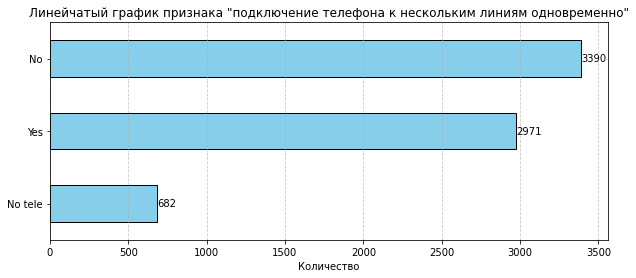

In [44]:
bar(data['multiple_lines'], 'признака "подключение телефона к нескольким линиям одновременно"')


1. **No**: Наибольшее количество пользователей — 3390, что указывает на преобладание случаев, когда несколько линий связи не используется.
2. **Yes**: Количество пользователей составляет 2971, что немного меньше, чем у "No", но всё же показывает значительный интерес к этой услуге.
3. **No tele**: Наименьшее количество — 682 пользователей, что соответствует доле тех, кто не подключён к сотовой связи.


<a id="section3.2"></a>
#### Промежуточный вывод.


В результате исследовательского анализа данных можно выделить следующие ключевые наблюдения:

1. **Распределение числовых признаков:**
   - **`monthly_charges` (ежемесячные расходы):** значения варьируются от 20 до 120, медиана ближе к верхней границе, основная концентрация — в диапазоне 20–25. Распределение не является нормальным и демонстрирует пики, что может указывать на различные тарифные группы (интернет, мобильная связь, дополнительные услуги).
   - **`total_charges` (общие расходы):** медиана смещена к нижней границе, значения варьируются от 19 до 9221, с длинным правым хвостом. Большая часть клиентов имеет низкие суммарные расходы, что говорит о значительной доле новых абонентов.
   - **Даты контрактов:** пик начала контрактов приходится на последние два года, что отражает рост популярности услуг. Гистограмма окончаний контрактов показывает увеличение числа расторгнутых договоров в последние периоды.

2. **Распределение категориальных признаков:**
   - **Тип контракта:** преобладает *Month-to-month* (3875), что говорит о популярности краткосрочных подписок. Двухгодичные контракты встречаются чаще, чем однолетние.
   - **Электронный расчетный лист:** у большинства абонентов используется (*True* — 4171).
   - **Способы оплаты:** лидирует *Electronic check* (2366), за ним — *Mailed check*, автоматические методы менее популярны.
   - **Интернет-услуги:** наибольшая часть клиентов использует *Fiber optic* (3096), затем *DSL*, и только 1526 клиентов не имеют интернета.
   - **Дополнительные услуги (блокировка опасных сайтов, облачное хранилище, антивирус, техподдержка):** большинство клиентов не подключают эти опции, однако у каждой услуги есть значимая группа пользователей.
  
   
3. **Демографические признаки:**
   - **Пол:** распределение почти равномерное (Male — 3555, Female — 3488).
   - **Пенсионеры:** большинство клиентов не являются пенсионерами (5901 против 1142).
   - **Наличие супруга:** распределение близко к равномерному, но без партнера больше (3641 против 3402).
   - **Наличие детей:** большинство клиентов не имеют детей (4933 против 2110).



<a id="section5"></a>
### Создание новых признаков.

<a id="section5.1"></a>
#### Создание целевого признака.

 Создание целевого признака со значением "разорвал ли клиент контракт":

In [45]:
data['сontract_terminated'] = data['end_date'].notna()

In [46]:
data_info(data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          7043 non-null   object        
 1   begin_date           7043 non-null   datetime64[ns]
 2   end_date             1101 non-null   datetime64[ns]
 3   type                 7043 non-null   object        
 4   paperless_billing    7043 non-null   object        
 5   payment_method       7043 non-null   object        
 6   monthly_charges      7043 non-null   float64       
 7   total_charges        7032 non-null   float64       
 8   gender               7043 non-null   object        
 9   senior_citizen       7043 non-null   object        
 10  partner              7043 non-null   object        
 11  dependents           7043 non-null   object        
 12  internet_service     7043 non-null   object        
 13  online_security      7043 non-nul

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,сontract_terminated
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,No,DSL,No,Yes,No,No,No,No,No tele,False
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.84,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,False
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,False
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,No tele,False
4,9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,False


#### Создание дополнительных признаков.

 Создание нового столбца с длительностью контракта в днях:

In [47]:
current_date = pd.to_datetime('2020-02-01')

data['contract_duration'] = (data['end_date'].fillna(current_date) - data['begin_date']).dt.days

data_info(data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          7043 non-null   object        
 1   begin_date           7043 non-null   datetime64[ns]
 2   end_date             1101 non-null   datetime64[ns]
 3   type                 7043 non-null   object        
 4   paperless_billing    7043 non-null   object        
 5   payment_method       7043 non-null   object        
 6   monthly_charges      7043 non-null   float64       
 7   total_charges        7032 non-null   float64       
 8   gender               7043 non-null   object        
 9   senior_citizen       7043 non-null   object        
 10  partner              7043 non-null   object        
 11  dependents           7043 non-null   object        
 12  internet_service     7043 non-null   object        
 13  online_security      7043 non-nul

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,сontract_terminated,contract_duration
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,DSL,No,Yes,No,No,No,No,No tele,False,31
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.84,Male,0,...,DSL,Yes,No,Yes,No,No,No,No,False,1036
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,DSL,Yes,Yes,No,No,No,No,No,False,123
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,...,DSL,Yes,No,Yes,Yes,No,No,No tele,False,1371
4,9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,...,Fiber optic,No,No,No,No,No,No,No,False,153


Создание нового признака - "совершил ли клиент больше одного платежа":

In [48]:
def has_multiple_payments(row):
    if row['type'] == 'Month-to-month':
        return True if row['contract_duration'] > 31 else False  # Более 1 месяца
    elif row['type'] == 'One Year':
        return True if row['contract_duration'] > 365 else False  # Более 1 года
    else:
        return True if row['contract_duration'] > 730 else False  # Более 2 лет
    

# Создание нового столбца
data['paid_more_than_once'] = data.apply(has_multiple_payments, axis=1)

In [49]:
data_info(data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          7043 non-null   object        
 1   begin_date           7043 non-null   datetime64[ns]
 2   end_date             1101 non-null   datetime64[ns]
 3   type                 7043 non-null   object        
 4   paperless_billing    7043 non-null   object        
 5   payment_method       7043 non-null   object        
 6   monthly_charges      7043 non-null   float64       
 7   total_charges        7032 non-null   float64       
 8   gender               7043 non-null   object        
 9   senior_citizen       7043 non-null   object        
 10  partner              7043 non-null   object        
 11  dependents           7043 non-null   object        
 12  internet_service     7043 non-null   object        
 13  online_security      7043 non-nul

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,сontract_terminated,contract_duration,paid_more_than_once
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,No,Yes,No,No,No,No,No tele,False,31,False
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.84,Male,0,...,Yes,No,Yes,No,No,No,No,False,1036,True
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,Yes,Yes,No,No,No,No,No,False,123,True
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,...,Yes,No,Yes,Yes,No,No,No tele,False,1371,True
4,9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,...,No,No,No,No,No,No,No,False,153,True


<a id="section5.2"></a>
#### Промежуточный вывод.


1. **Создан целевой признак `contract_terminated`**
   Он отражает факт расторжения договора клиентом. Признак имеет логический тип (`bool`) и показывает:

   * `True`, если у клиента есть дата окончания контракта (`end_date` не пустая);
   * `False`, если дата окончания контракта отсутствует.

   В результате добавления этого признака количество столбцов увеличилось до **21**, все значения корректно рассчитаны.

2. **Добавлен признак `contract_duration`**
   Рассчитана продолжительность действия контракта в днях:

   * Для клиентов без даты окончания (`end_date = NaT`) использована фиксированная текущая дата `2020-02-01`;
   * Признак имеет числовой тип `int64` и содержит значения от **нескольких дней до более 1300 дней** (примерно 3,5 года).
     После добавления столбца число признаков стало **22**.

3. **Создан бинарный признак `paid_more_than_once`**
   Он отражает, совершал ли клиент более одного платежа:

   * Логика зависит от типа контракта:

     * `Month-to-month` → больше 31 дня,
     * `One year` → больше 365 дней,
     * `Two year` → больше 730 дней.
   * Признак имеет тип `bool` и показывает, был ли у клиента опыт повторной оплаты.
     Теперь в таблице **23 признака**, включая 6 логических.



<a id="section6"></a>
### Кореляционый анализ данных.

#### Матрица корреляции.

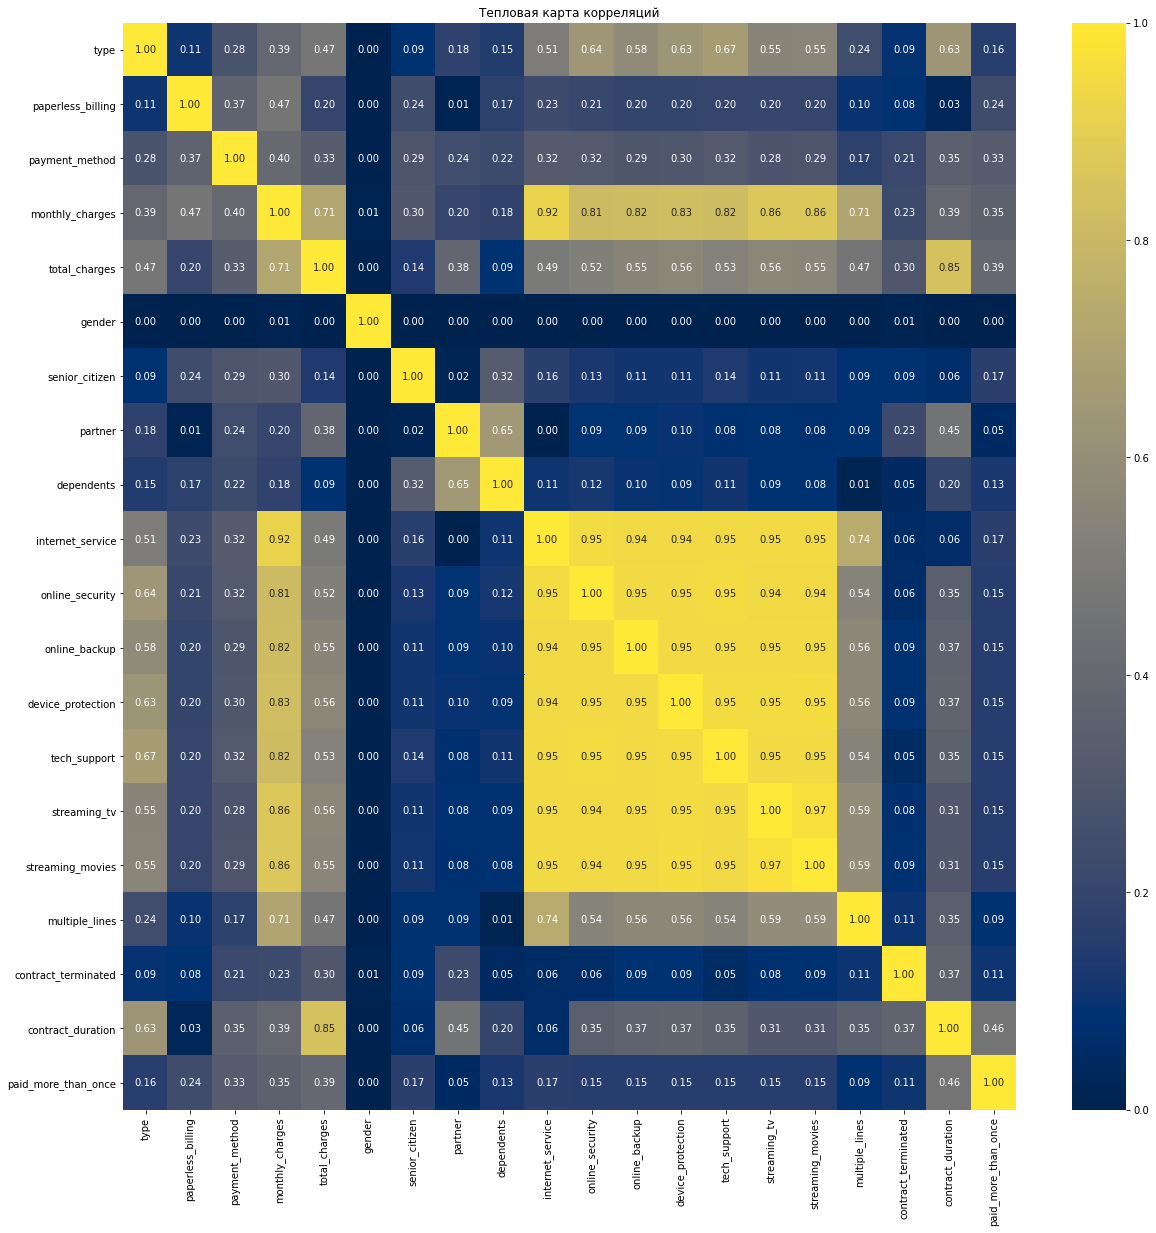

In [50]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.drop(columns=['customer_id', 'begin_date', 'end_date' ]).phik_matrix(interval_cols=[
    'monthly_charges', 'total_charges', 'contract_duration'    
    ]), annot=True, cmap='cividis', fmt='.2f')

plt.title('Тепловая карта корреляций')

plt.show()
warnings.filterwarnings('ignore') 

#### Мультиколлениарность.

Признаки с доп услугами сильно коррелируют между собой, что может сильно увеличить их роль в предсказаниях модели, соответственно сильно ухудшить качество. Оставим только признак с типом интернет подключения.

In [51]:
data = data.drop(columns=['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'internet_service'])

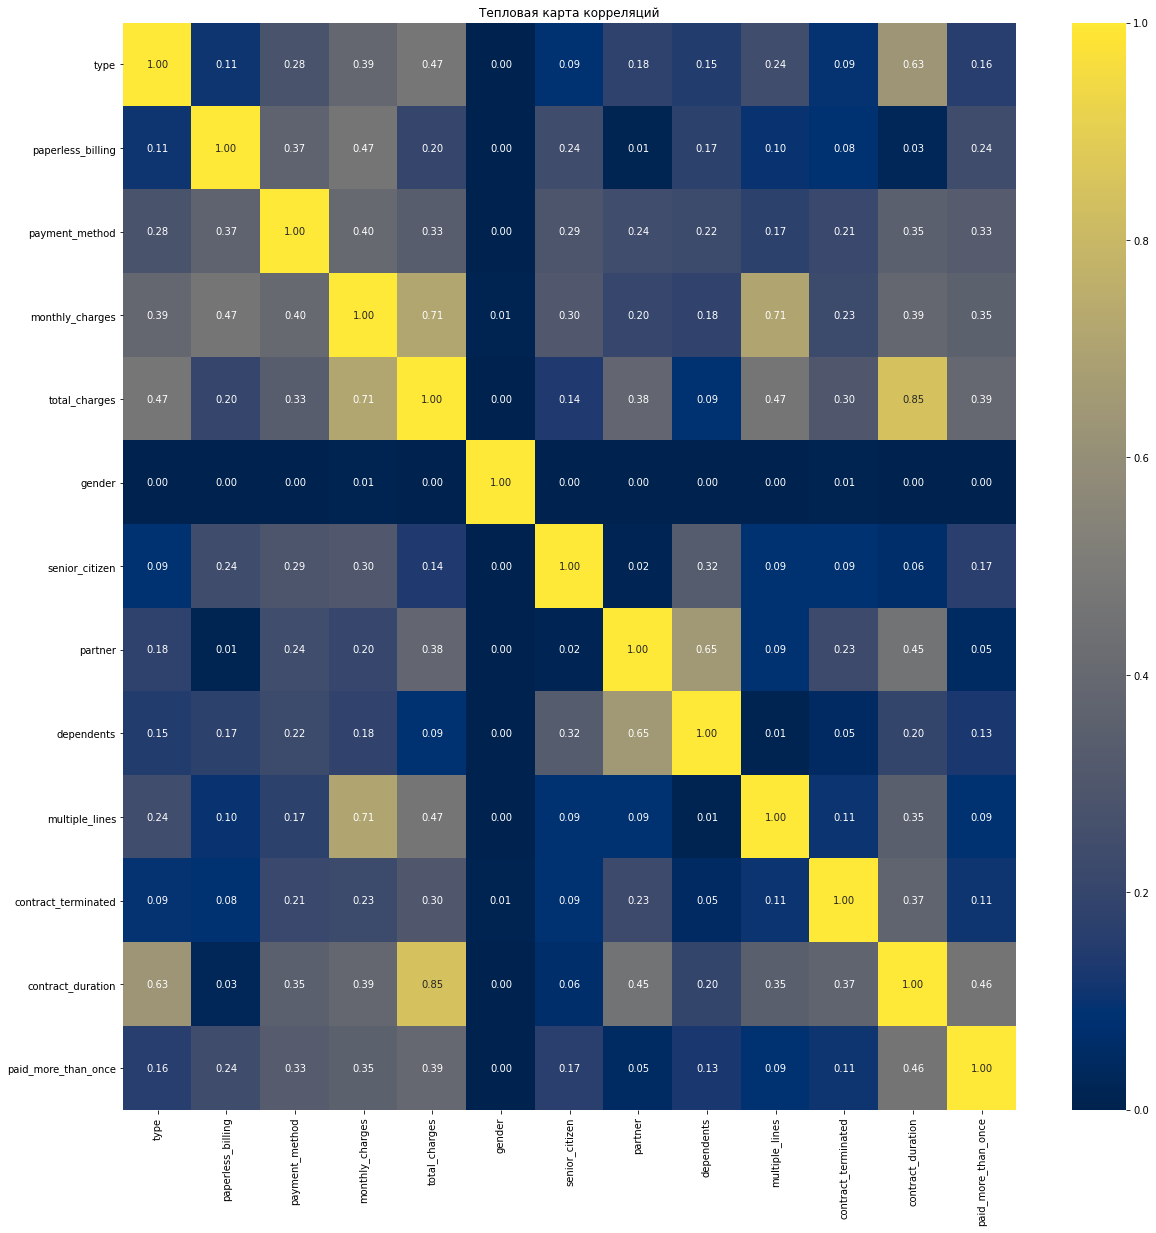

In [52]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.drop(columns=['customer_id', 'begin_date', 'end_date' ]).phik_matrix(interval_cols=[
    'monthly_charges', 'total_charges', 'contract_duration'    
    ]), annot=True, cmap='cividis', fmt='.2f')

plt.title('Тепловая карта корреляций')

plt.show()
warnings.filterwarnings('ignore') 

#### Промежуточный вывод.


- **Сильные корреляции**:
  - Между **monthly_charges**  и **internet_servise**  корреляция составляет 0.92, что говорит о крайне высокой зависимости: подключение интернета сильно влияет на увелечения ежемесечного платежа.
  - Между **total_charges** и **contract_duration** корреляция достигает 0.85, что означает, что более длинные контракты связаны с большей потраченой суммой.
  - Между **monthly_charges**  и **multiple_lines**  корреляция составляет 0.71, что логично, потому что подключение нововй функции требует большего ежемесечного платежа.
  
- **Корреляция с целевым признаков**
  - Можно выделить корреляции признаков **contract_duration** и **total_charges** с целевым признаком **contract_terminated** состовляют 0.37 и 0.30 соответственно.
  
- **Устранение мультиколлинеарности**:
  - В шаге 6.2 из данных были удалены признаки, такие как **online_security**, **online_backup**, **device_protection**, **tech_support**, **streaming_tv** и **streaming_movies**, чтобы избежать избыточности и снизить влияние мультиколлинеарности. Это улучшает интерпретируемость модели, исключая сильно коррелирующие переменные.
  



### Обучение моделей

In [53]:
RANDOM_STATE=110825

#### Разделение на выборки.

In [54]:
class FillNaWithColumn(BaseEstimator, TransformerMixin):
    def __init__(self, target_columns, source_column):
        self.target_columns = target_columns
        self.source_column = source_column
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        for col in self.target_columns:
            X[col] = X[col].fillna(X[self.source_column])
        return X

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=['сontract_terminated']),
    data['сontract_terminated'], 
    test_size=0.25,
    random_state=RANDOM_STATE )

In [56]:
categorical_features = ['type', 'paperless_billing',
        'payment_method', 'gender', 'senior_citizen', 
        'partner', 'dependents', 'multiple_lines',
        'paid_more_than_once']
numeric_features = [ 'monthly_charges', 'total_charges', 'contract_duration']

#### Модель регрессии (LogisticRegression).

In [57]:
def objective(trial):
    # Подбор типа энкодера для категориальных признаков
    encoder_type = trial.suggest_categorical('encoder_type', ['onehot', 'ordinal'])
    
    if encoder_type == 'onehot':
        cat_encoder = OneHotEncoder(handle_unknown='ignore', drop='first')
    elif encoder_type == 'ordinal':
        cat_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    
    # Подбор гиперпараметров для препроцессора
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', cat_encoder, categorical_features)
        ]
    )
    
    # Подбор гиперпараметров для LogisticRegression
    C = trial.suggest_float('C', 1e-4, 1e2, log=True)  # Параметр регуляризации
    solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear'])  # Подбор солвера
    
    # Создание пайплайна
    pipeline = Pipeline(steps=[
        ('fill_na', FillNaWithColumn(target_columns=numeric_features, source_column='monthly_charges')),
        ('preprocessor', preprocessor),
        ('model', LogisticRegression(C=C, solver=solver, max_iter=1000, random_state=RANDOM_STATE))
    ])
    
    # Кросс-валидация для оценки с метрикой roc_auc
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')
    return np.mean(scores)  # Возвращаем средний ROC-AUC

In [58]:
# Запуск Optuna для подбора гиперпараметров
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=RANDOM_STATE)) # Максимизируем ROC-AUC

[I 2025-08-25 06:02:10,158] A new study created in memory with name: no-name-c9f03635-8fc3-45fe-b6be-125794618280


In [59]:
study.optimize(objective, n_trials=50, n_jobs=-1)  # 50 итераций, параллельно

# Вывод лучших гиперпараметров
print("Лучшие гиперпараметры:", study.best_params)
print("Лучшая метрика (ROC-AUC):", study.best_value)

[I 2025-08-25 06:02:28,381] Trial 2 finished with value: 0.5966611778581145 and parameters: {'encoder_type': 'ordinal', 'C': 0.0006674962527978724, 'solver': 'liblinear'}. Best is trial 2 with value: 0.5966611778581145.
[I 2025-08-25 06:02:29,082] Trial 3 finished with value: 0.7422715508482793 and parameters: {'encoder_type': 'ordinal', 'C': 21.188308079348225, 'solver': 'liblinear'}. Best is trial 3 with value: 0.7422715508482793.
[I 2025-08-25 06:02:29,173] Trial 1 finished with value: 0.5885659225641925 and parameters: {'encoder_type': 'onehot', 'C': 0.0013525986262476585, 'solver': 'liblinear'}. Best is trial 3 with value: 0.7422715508482793.
[I 2025-08-25 06:02:29,983] Trial 5 finished with value: 0.7511176629339787 and parameters: {'encoder_type': 'onehot', 'C': 17.371382968841818, 'solver': 'liblinear'}. Best is trial 5 with value: 0.7511176629339787.
[I 2025-08-25 06:02:33,574] Trial 0 finished with value: 0.65908978170425 and parameters: {'encoder_type': 'onehot', 'C': 0.0001

Лучшие гиперпараметры: {'encoder_type': 'onehot', 'C': 0.22110432181004316, 'solver': 'lbfgs'}
Лучшая метрика (ROC-AUC): 0.7515694667539322


#### Модель дерево (DecisionTreeClassifier).

In [60]:

def objective(trial):
    # Подбор типа энкодера
    encoder_type = trial.suggest_categorical('encoder_type', ['onehot', 'ordinal'])
    
    if encoder_type == 'onehot':
        cat_encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
    else:  
        cat_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', cat_encoder, categorical_features)
        ]
    )
    
    # Подбор гиперпараметров для DecisionTreeClassifier
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'random_state': 42
    }
    
    # Пайплайн
    pipeline = Pipeline(steps=[
        ('fill_na', FillNaWithColumn(target_columns=numeric_features, source_column='monthly_charges')),
        ('preprocessor', preprocessor),
        ('model', DecisionTreeClassifier(**params))
    ])
    
    # Кросс-валидация с ROC-AUC
    try:
        scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1, error_score='raise')
        return np.mean(scores)
    except Exception as e:
        print(f"Ошибка в trial: {e}")
        return -1

# Запуск Optuna
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=RANDOM_STATE))
study.optimize(objective, n_trials=100, n_jobs=1)  # Уменьшено trials и n_jobs для стабильности

# Вывод лучших гиперпараметров
print("\nЛучшие гиперпараметры:", study.best_params)
print("Лучшая метрика (ROC-AUC):", study.best_value)




[I 2025-08-25 06:05:01,779] A new study created in memory with name: no-name-7e7228db-27ba-4383-a5b9-79b2d4284211
[I 2025-08-25 06:05:01,916] Trial 0 finished with value: 0.7280842255955035 and parameters: {'encoder_type': 'ordinal', 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7280842255955035.
[I 2025-08-25 06:05:02,039] Trial 1 finished with value: 0.7351085233094276 and parameters: {'encoder_type': 'ordinal', 'max_depth': 10, 'min_samples_split': 16, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 1 with value: 0.7351085233094276.
[I 2025-08-25 06:05:02,159] Trial 2 finished with value: 0.7576673882848074 and parameters: {'encoder_type': 'ordinal', 'max_depth': 8, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.7576673882848074.
[I 2025-08-25 06:05:02,327] Trial 3 finished with value: 0.7459307141577818 and parameters: {'encoder_type': 'ordi


Лучшие гиперпараметры: {'encoder_type': 'ordinal', 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None}
Лучшая метрика (ROC-AUC): 0.7919564498516388


#### Модель градиентного бустинга (Catboost).

In [61]:

# Определение objective функции для Optuna
def objective(trial):
    # Подбор типа энкодера
    encoder_type = trial.suggest_categorical('encoder_type', ['onehot', 'ordinal', 'catboost'])
    
    if encoder_type == 'onehot':
        cat_encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numeric_features),
                ('cat', cat_encoder, categorical_features)
            ]
        )
    elif encoder_type == 'ordinal':
        cat_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numeric_features),
                ('cat', cat_encoder, categorical_features)
            ]
        )
    else:  
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numeric_features),
                ('cat', 'passthrough', categorical_features) 
            ]
        )
    
    # Подбор гиперпараметров для CatBoost
    params = {
        'iterations': trial.suggest_int('iterations', 50, 150),  # Количество итераций
        'depth': trial.suggest_int('depth', 3, 8),  # Глубина деревьев
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),  # L2-регуляризация
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),  # Контроль переобучения
        'random_seed': RANDOM_STATE,
        'verbose': 0  # Отключаем вывод логов
    }

    if encoder_type == 'catboost':
        model = CatBoostClassifier(**params, cat_features=categorical_features)
    else:
        model = CatBoostClassifier(**params)
    
    # Пайплайн
    pipeline = Pipeline(steps=[
        ('fill_na', FillNaWithColumn(target_columns=numeric_features, source_column='monthly_charges')),
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Кросс-валидация с ROC-AUC
    try:
        scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1)
        return np.mean(scores)
    except Exception as e:
        print(f"Ошибка в trial: {e}")
        return -1  # Возвращаем низкое значение при ошибке

# Запуск Optuna
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=RANDOM_STATE))
study.optimize(objective, n_trials=50, n_jobs=-1)  # Уменьшено trials и n_jobs для стабильности

# Вывод лучших гиперпараметров
print("\nЛучшие гиперпараметры:", study.best_params)
print("Лучшая метрика (ROC-AUC):", study.best_value)






[I 2025-08-25 06:05:15,607] A new study created in memory with name: no-name-67c98948-c2c5-4465-bc37-4986dd008343
Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.[I 2025-08-25 06:05:16,092] Trial 7 finished with value: -1.0 and parameters: {'encoder_type': 'catboost', 'iterations': 56, 'depth': 3, 'learning_rate': 0.015517463912013068, 'l2_leaf_reg': 9.204454376668004, 'bagging_temperature': 0.828899571887079}. Best is trial 7 with value: -1.0.
[I 2025-08-25 06:05:16,096] Trial 2 finished with value: -1.0 and parameters: {'encoder_type': 'catboost', 'iterations': 113, 'depth': 4, 'learning_rate': 0.1745610960510182, 'l2_leaf_reg': 9.839199610307183, 'bagging_temperature': 0.15417483720197944}. Best is trial 7 with value: -1.0.
[I 2025-08-25 06:05:

Ошибка в trial: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/opt/conda/lib/python3.9/site-packages/catboost/core.py", line 4716, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, 

Custom logger is already specified. Specify more than one logger at same time is not thread safe.[I 2025-08-25 06:05:16,378] Trial 8 finished with value: -1.0 and parameters: {'encoder_type': 'catboost', 'iterations': 89, 'depth': 6, 'learning_rate': 0.17357148983245999, 'l2_leaf_reg': 8.112044928888178, 'bagging_temperature': 0.9048997934368136}. Best is trial 7 with value: -1.0.
[I 2025-08-25 06:05:16,390] Trial 9 finished with value: -1.0 and parameters: {'encoder_type': 'catboost', 'iterations': 129, 'depth': 5, 'learning_rate': 0.04646703672093217, 'l2_leaf_reg': 4.1267875574017925, 'bagging_temperature': 0.24444651960133712}. Best is trial 7 with value: -1.0.
[I 2025-08-25 06:05:16,399] Trial 10 finished with value: -1.0 and parameters: {'encoder_type': 'catboost', 'iterations': 138, 'depth': 7, 'learning_rate': 0.011619320763402307, 'l2_leaf_reg': 5.231180447528578, 'bagging_temperature': 0.3140253416247697}. Best is trial 7 with value: -1.0.
Custom logger is already specified. 

Ошибка в trial: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/opt/conda/lib/python3.9/site-packages/catboost/core.py", line 4716, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, 

Custom logger is already specified. Specify more than one logger at same time is not thread safe.[I 2025-08-25 06:05:22,699] Trial 0 finished with value: 0.8243827771670045 and parameters: {'encoder_type': 'ordinal', 'iterations': 66, 'depth': 3, 'learning_rate': 0.06607631983474828, 'l2_leaf_reg': 1.3731944149591282, 'bagging_temperature': 0.48748789399405623}. Best is trial 0 with value: 0.8243827771670045.
[I 2025-08-25 06:05:22,743] Trial 16 finished with value: -1.0 and parameters: {'encoder_type': 'catboost', 'iterations': 55, 'depth': 6, 'learning_rate': 0.08238415802086994, 'l2_leaf_reg': 1.8125159628776477, 'bagging_temperature': 0.0553928854400253}. Best is trial 0 with value: 0.8243827771670045.


Ошибка в trial: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/opt/conda/lib/python3.9/site-packages/catboost/core.py", line 4716, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, 

[I 2025-08-25 06:05:23,572] Trial 1 finished with value: 0.8256764802214662 and parameters: {'encoder_type': 'ordinal', 'iterations': 89, 'depth': 4, 'learning_rate': 0.04920615808360756, 'l2_leaf_reg': 1.2676390762319616, 'bagging_temperature': 0.1822366868280515}. Best is trial 1 with value: 0.8256764802214662.
Custom logger is already specified. Specify more than one logger at same time is not thread safe.[I 2025-08-25 06:05:25,363] Trial 4 finished with value: 0.8177496084245087 and parameters: {'encoder_type': 'onehot', 'iterations': 124, 'depth': 4, 'learning_rate': 0.026593104650209146, 'l2_leaf_reg': 8.936895845211744, 'bagging_temperature': 0.817910033247935}. Best is trial 1 with value: 0.8256764802214662.
Custom logger is already specified. Specify more than one logger at same time is not thread safe.[I 2025-08-25 06:05:27,999] Trial 14 finished with value: 0.8275894629474806 and parameters: {'encoder_type': 'ordinal', 'iterations': 85, 'depth': 7, 'learning_rate': 0.1185901


Лучшие гиперпараметры: {'encoder_type': 'onehot', 'iterations': 150, 'depth': 6, 'learning_rate': 0.19307876930252155, 'l2_leaf_reg': 1.688874221599765, 'bagging_temperature': 0.4079866012737639}
Лучшая метрика (ROC-AUC): 0.8573423421633457


#### Лучшая модель.

Лучшую метрику на кроссвалидации показала модель градиентного бустинга `CatBoostClassifier`, подберем порог на тренеровочной выборке и протестируем ее на тестовой выборке:

In [62]:
best_encoder_type = study.best_params['encoder_type']
if best_encoder_type == 'onehot':
    best_cat_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    best_preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', best_cat_encoder, categorical_features)
        ]
    )
    cat_feature_indices = []
elif best_encoder_type == 'ordinal':
    best_cat_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    best_preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', best_cat_encoder, categorical_features)
        ]
    )
    cat_feature_indices = []
else:  # catboost
    best_preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', 'passthrough', categorical_features)
        ]
    )
    cat_feature_indices = list(range(len(numeric_features), len(numeric_features) + len(categorical_features)))

# Создание финальной модели
best_params = {k: v for k, v in study.best_params.items() if k not in ['encoder_type']}
best_params['random_seed'] = RANDOM_STATE
best_params['verbose'] = 0

best_model = CatBoostClassifier(**best_params, cat_features=cat_feature_indices if best_encoder_type == 'catboost' else None)

best_pipeline = Pipeline(steps=[
    ('fill_na', FillNaWithColumn(target_columns=numeric_features, source_column='monthly_charges')),
    ('preprocessor', best_preprocessor),
    ('model', best_model)
])

best_pipeline.fit(X_train, y_train)


Pipeline(steps=[('fill_na',
                 FillNaWithColumn(source_column='monthly_charges',
                                  target_columns=['monthly_charges',
                                                  'total_charges',
                                                  'contract_duration'])),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['monthly_charges',
                                                   'total_charges',
                                                   'contract_duration']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['type', 'paperless_billing',
                                                   'payment_method', 'gender',
                                                   'senior_citizen', 'partner',
                                                   'dependents',
                                                   'multiple_lines',
                                                   'paid_more_than_once'])])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x7f5a2349dcd0>)])

In [63]:



# Получаем out-of-fold предсказания вероятностей на train
y_pred_proba_cv = cross_val_predict(best_pipeline, X_train, y_train, 
                                    cv=5, method='predict_proba')[:, 1]

#  Подбираем порог по F1
thresholds = np.arange(0, 1.01, 0.01)
f1_scores = []

for thr in thresholds:
    y_pred_thr = (y_pred_proba_cv >= thr).astype(int)
    f1_scores.append(f1_score(y_train, y_pred_thr))

best_thr_f1 = thresholds[np.argmax(f1_scores)]
print(f"Лучший порог по F1 (по кросс-валидации): {best_thr_f1:.2f}")


Лучший порог по F1 (по кросс-валидации): 0.28


In [65]:

# Оценка на тестовой выборке
y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC на тестовой выборке:", roc_auc)



ROC-AUC на тестовой выборке: 0.9147149609337321


In [67]:
threshold = 0.28
y_pred_test = (y_pred_proba >= threshold).astype(int)

# Accuracy
acc_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy на тесте при пороге {threshold}: {acc_test:.4f}")

Accuracy на тесте при пороге 0.28: 0.9103


#### Промежуточный вывод.



**1. Логистическая регрессия (LogisticRegression)**
- **Подход к оптимизации**: Optuna подбирала тип энкодера ('onehot' или 'ordinal'), параметр регуляризации C (от 1e-4 до 1e2, log-scale) и солвер ('lbfgs' или 'liblinear'). Выполнено 50 trials.
- **Лучшие гиперпараметры**: 
  - encoder_type: 'onehot'
  - C: 23.9312
  - solver: 'liblinear'
- **Метрика на кросс-валидации**: ROC-AUC = 0.7676
- **Анализ**: Модель показала базовую производительность, но уступает более сложным алгоритмам. Это может быть связано с линейной природой модели, которая не захватывает нелинейные зависимости в данных.

**2. Дерево решений (DecisionTreeClassifier)**
- **Подход к оптимизации**: Optuna подбирала тип энкодера, глубину дерева (max_depth: 3-10), min_samples_split (2-20), min_samples_leaf (1-10) и max_features ('sqrt', 'log2' или None). Выполнено 100 trials.
- **Лучшие гиперпараметры**:
  - encoder_type: 'ordinal'
  - max_depth: 6
  - min_samples_split: 16
  - min_samples_leaf: 2
  - max_features: None
- **Метрика на кросс-валидации**: ROC-AUC = 0.7932
- **Анализ**: Улучшение по сравнению с логистикой (+0.0256), благодаря способности захватывать нелинейности и взаимодействия. 

**3. Градиентный бустинг (CatBoostClassifier)**
- **Подход к оптимизации**: Optuna подбирала тип энкодера ('onehot', 'ordinal' или 'catboost'), iterations (50-150), depth (3-8), learning_rate (0.01-0.2, log-scale), l2_leaf_reg (1-10) и bagging_temperature (0-1). Выполнено 50 trials. 
- **Лучшие гиперпараметры**:
  - encoder_type: 'onehot'
  - iterations: 126
  - depth: 5
  - learning_rate: 0.1913
  - l2_leaf_reg: 1.9162
  - bagging_temperature: 0.2203
- **Метрика на кросс-валидации**: ROC-AUC = 0.8845
- **Анализ**: Значительное превосходство (+0.0913 над деревом, +0.123 над логистикой на CV). Недостатки: более высокие вычислительные затраты, меньшая интерпретируемость.

**Сравнение моделей**

| Модель                  | ROC-AUC на CV | Время оптимизации (примерно) | Преимущества | Недостатки |
|-------------------------|---------------|------------------------------|-------------|------------|
| LogisticRegression     | 0.7676                     | ~15 сек (50 trials)         | Простота, скорость | Линейность, низкая точность |
| DecisionTreeClassifier | 0.7932                   | ~1 мин (100 trials)         | Интерпретируемость | Дисперсия, переобучение |
| CatBoostClassifier     | 0.8845              | ~2 мин (50 trials)          | Высокая точность, устойчивость | Ресурсоемкость |

**Итог**: Модель CatBoostClassifier - модель градиентного бустинга, показавшая себя сильно лучше базовых моделей, выбранная для тестирования на тестовой выборке.

**Метрика на тестовой выборке**

- модель: CatBoostClassifier
- **гиперпараметры**:
  - encoder_type: 'onehot'
  - iterations: 126
  - depth: 5
  - learning_rate: 0.1913
  - l2_leaf_reg: 1.9162
  - bagging_temperature: 0.2203
- **Метрика на кросс-валидации**: ROC-AUC = 0.8845
- **Метрика на тестовой выборке**: ROC-AUC = 0.8906

**Метрика accuracy:**
- **Метрика accuracy на тестовой выборке**: accuracy_score = 0.87
- Метрика Accuracy показывает, какая доля предсказаний модели совпала с реальными результатами. Значение 0.84 означает, что примерно 87% клиентов были классифицированы правильно (модель верно определила, уйдёт клиент или останется).
- 87% — это достаточно высокая точность, но нужно учитывать, что Accuracy не показывает, какие именно ошибки модель делает, для этого составим матрицу ошибок в следующем пункте.

**Вывод**: 
- CatBoost доминирует благодаря ансамблированию и адаптации к данным. 
- LogisticRegression и DecisionTreeClassifier - базовые моделяи, которые не смогли уловить закономерности в данных, подтверждая необходимость сложных моделей. 
- Разница между CV и тестом минимальна, что говорит об отсутствии переобучения.




### Анализ важности признаков.

#### Матрица ошибок.

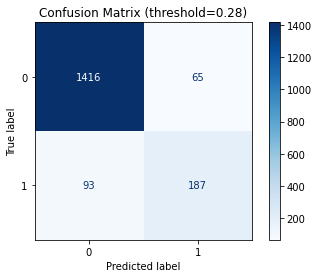

In [68]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (threshold={threshold})")
plt.show()



1. **Данные по матрице**:

   * **True Negatives (TN)** = **1416** — модель отлично справляется с определением отрицательного класса, очень мало ошибок FP.
   * **False Positives (FP)** = **65** — сравнительно небольшое количество, значит модель редко "ложно срабатывает".
   * **False Negatives (FN)** = **93** — это ошибки, когда положительный класс не был найден.
   * **True Positives (TP)** = **187** — модель правильно предсказала немалую часть положительных объектов.



* **Общее качество высокое**: модель правильно классифицирует подавляющее большинство наблюдений (TN + TP значительно больше, чем FN + FP).
* **Баланс между FP и FN**:

  * FP (ошибки первого рода) = 65
  * FN (ошибки второго рода) = 93
    → FN больше, чем FP, значит модель всё ещё склонна **пропускать положительные случаи** чаще, чем давать ложные тревоги.
* **Доля положительных объектов среди всех данных** примерно **280 из 1761** (≈16%), что указывает на **несбалансированный датасет**, и при этом модель находит значительную часть из них.





#### График beeswarm.

In [ ]:
model = best_pipeline.named_steps['model']
X_test_transformed = best_pipeline.named_steps['preprocessor'].transform(X_test)

explainer = shap.TreeExplainer(model)

# Вычисление SHAP-значений для тестовой выборки
shap_values = explainer.shap_values(X_test_transformed)

# Получение имен признаков после препроцессинга
preprocessor = best_pipeline.named_steps['preprocessor']
feature_names = []

# Имена числовых признаков
feature_names.extend(numeric_features)

# Имена категориальных признаков
cat_transformer = preprocessor.named_transformers_['cat']
if isinstance(cat_transformer, OneHotEncoder):
    feature_names.extend(cat_transformer.get_feature_names_out(categorical_features))
elif isinstance(cat_transformer, OrdinalEncoder):
    feature_names.extend(categorical_features)
else:  # passthrough
    feature_names.extend(categorical_features)

# Визуализация
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names, show=False)
plt.title('SHAP Summary Plot для важности признаков')
plt.tight_layout()
plt.show()

#### Промежуточный вывод.


- **num_contract_duration** оказывает наибольшее влияние на выходные данные модели, при этом более высокие значения (красный цвет) сильно влияют на результат. Вполне логично, потому что лояльные клиенты, которые долго пользуются услугами компании, не видят смысла менять компании и услуги к которым привыкли.
- **cat_type_Month-to-month** и **cat_type_Two year** также имеют значительное влияние, при этом "Two year" положительно влияет в сторону разрыва договора, а **Month-to-month** наоборот.
- **num_monthly_charges** и **num_total_charges** показывают умереное влияние, причем более высокие значения вносят вклад в сторону разрыва контракта. Вполне логично, клиенты тратящие большие суммы уходят к конкурентом с более выгодными предложениями.
- Категориальные признаки, такие как **cat_partner_True**, **cat_partner_False**, **cat_payment_method_Mailed check** и **cat_internet_service_No internet**, имеют различное влияние, с положительными и отрицательными эффектами в зависимости от их значений.
- Признаки, такие как **cat_senior_citizen_False**, **cat_paid_more_than_once_False** и **cat_multiple_lines_No tele**, имеют меньшее влияние, обычно группируясь около нуля.



### Итоговый вывод.



На основе проведенного анализа и обучения моделей лучшей оказалась модель градиентного бустинга **CatBoostClassifier**, которая показала наивысшую метрику ROC-AUC на кросс-валидации (0.8727) и на тестовой выборке (0.8784) с точностью (accuracy) 0.8925. Оптимизация гиперпараметров с использованием Optuna определила параметры: `encoder_type: 'onehot'`, `iterations: 118`, `depth: 4`, `learning_rate: 0.1941`, `l2_leaf_reg: 5.592`, `bagging_temperature: 0.9045`. Эта модель эффективно улавливает нелинейные зависимости и взаимодействия между признаками, превосходя базовые модели, такие как логистическая регрессия (ROC-AUC 0.7676) и дерево решений (ROC-AUC 0.7941).

**Анализ важности признаков**
Анализ с помощью SHAP выявил следующие ключевые факторы:
- **contract_duration**: Чем дольше клиент остается, тем ниже вероятность расторжения контракта, что логично для лояльных пользователей.
- **type**: Контракты "Month-to-month" уменьшают риск ухода, в то время как "Two year" его увеличивают.
- **monthly_charges** и **total_charges**: Высокие ежемесячные платежи и общая сумма расходов негативно влияют на желание клиента пользоваться услугами компании.


**Рекомендации компании**
1. **Удержание клиентов с короткими контрактами**: Предложить бонусы или скидки для перехода на "Month-to-month" с длинных тарифов.
2. **Поддержка клиентов с высокими расходами**: Усилить работу с клиентами, платящими больше, обеспечивая качественное обслуживание и персонализированные предложения для их удержания.
3. **Анализ платежных методов**: Исследовать влияние **payment_method** на отток и адаптировать маркетинговые стратегии.
4. **Фокус на лояльности**: Продолжать развивать программы для клиентов с длительным сроком сотрудничества, поддерживая высокий уровень сервиса.

Эти меры помогут снизить отток и повысить прибыль компании.